# vCAT Behavioral Descriptives

In [1]:
import os
from os.path import join
import numpy as np
import pandas as pd
from glob import glob
from math import sqrt
%matplotlib inline
import seaborn as sns
sns.set_palette('muted')
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from scipy import stats
from scipy.integrate import simps, trapz

import warnings
warnings.filterwarnings("ignore")

## Localizer

### Simplify Behavioral Output: Special Circumstance for vCAT_003

### Simplify Behavioral Output: Remaining Participants

## Localizer Descriptives

In [2]:
subs = ['sub-005', 'sub-006', 'sub-007', 'sub-008', 'sub-010', 
        'sub-012', 'sub-013', 'sub-014', 'sub-015', 'sub-016', 
        'sub-018', 'sub-019', 'sub-020', 'sub-021', 'sub-022', 
        'sub-023', 'sub-024', 'sub-025', 'sub-026', 'sub-027', 
        'sub-028', 'sub-029', 'sub-030', 'sub-031', 'sub-032']

count_table = {}
ctstd_table = {}
rt_table = {}
rtstd_table = {}

for i, sub in enumerate(subs):
    sub_dir = '/home/data/madlab/Mattfeld_vCAT/behav/{0}/'.format(sub)
    loc_files = sorted(glob(join(sub_dir, '{0}_simp_loc*.csv'.format(sub)))) 
    ct_dict = {}
    rt_dict = {}
    
    for j, loc in enumerate(loc_files): #iterate through both localizer filles
        curr_loc = pd.read_csv(loc_files[j]) #open using Pandas read_csv        
        trialtype = curr_loc['trialtype'].values #variables containing key values
        stim = curr_loc['stim'].values
        correct = curr_loc['acc'].values
        response = curr_loc['resp'].values
        rt = curr_loc['rt'].values        
        
        female_corr = np.where((stim == 'female') & (correct == 1))[0]
        female_incorr = np.where((stim == 'female') & (correct == 0) & (response != "None"))[0]
        male_corr = np.where((stim == 'male') & (correct == 1))[0]
        male_incorr = np.where((stim == 'male') & (correct == 0) & (response != "None"))[0]
        water_corr = np.where((stim == 'water') & (correct == 1))[0]
        water_incorr = np.where((stim == 'water') & (correct == 0) & (response != "None"))[0]
        land_corr = np.where((stim == 'land') & (correct == 1))[0]
        land_incorr = np.where((stim == 'land') & (correct == 0) & (response != "None"))[0]
        less_corr = np.where((stim == 'less') & (correct == 1))[0]
        less_incorr = np.where((stim == 'less') & (correct == 0) & (response != "None"))[0]
        greater_corr = np.where((stim == 'greater') & (correct == 1))[0]
        greater_incorr = np.where((stim == 'greater') & (correct == 0) & (response != "None"))[0]
        img_NR = np.where((trialtype == 0) & (response == "None"))[0] 
        math_NR = np.where((trialtype == 1) & (response == "None"))[0]
        
        female_corr_RT = rt[female_corr]
        female_incorr_RT = rt[female_incorr]
        male_corr_RT = rt[male_corr]
        male_incorr_RT = rt[male_incorr]
        water_corr_RT = rt[water_corr]
        water_incorr_RT = rt[water_incorr]
        land_corr_RT = rt[land_corr]
        land_incorr_RT = rt[land_incorr]
        less_corr_RT = rt[less_corr]
        less_incorr_RT = rt[less_incorr]
        greater_corr_RT = rt[greater_corr]
        greater_incorr_RT = rt[greater_incorr]
               
        #Creation of a flexible naming convention for dictionary keys & contents        
        for curr_name in ['female_corr', 'female_incorr', 'male_corr', 'male_incorr', 
                          'water_corr', 'water_incorr', 'land_corr', 'land_incorr',
                          'less_corr', 'less_incorr', 'greater_corr', 'greater_incorr',
                           'img_NR', 'math_NR']: 
            rt_name = '{0}_RT'.format(curr_name) #RT ariable name to use with eval()           
            if not curr_name in ct_dict: #if trialtype not in count dict
                ct_dict[curr_name] = [] #add empty key to count dict             
            ct_dict[curr_name].append(len(eval(curr_name))) #append length of current trialtype
            if 'NR' not in curr_name: #NR not included in RT table
                if not curr_name in rt_dict: #current trial type not in table
                    rt_dict[curr_name] = []  #add empty key to RT dict
                rt_eval = eval(rt_name) #convert curr_name from string to variable
                rt_dict[curr_name].append(eval(rt_name)) #append length of current trialtype             

    for key in ct_dict: #sum values for each Ss
        ct_dict[key] = np.sum(ct_dict[key]) 
        if not key in count_table:
            count_table[key] = []
        count_table[key].append(ct_dict[key]) #add summed Ss value to master table

    for key in rt_dict: #averages RT for each Ss
        if len(rt_dict[key][0]) < 1 or len(rt_dict[key][1]) < 1: #one of the trials types for a loc file is empty
            if len(rt_dict[key][0]) > 0: #loc_1 has at least 1 value
                rt_dict[key] = np.average(rt_dict[key][0]) #               
                if not key in rt_table:
                    rt_table[key] = []
                rt_table[key].append(rt_dict[key])                
            elif len(rt_dict[key][1]) > 0:
                rt_dict[key] = np.average(rt_dict[key][1])  
                if not key in rt_table:
                    rt_table[key] = []
                rt_table[key].append(rt_dict[key])  
            else:
                rt_dict[key] = None  
                if not key in rt_table:
                    rt_table[key] = []
                rt_table[key].append(rt_dict[key]) 
        else: 
            rt_concat = np.concatenate((rt_dict[key][0], rt_dict[key][1]), axis=None)
            rt_dict[key] = np.average(rt_concat)
            if not key in rt_table:
                rt_table[key] = []
            rt_table[key].append(rt_dict[key])  

df_loc_freq = pd.DataFrame(count_table, index = subs) 
df_loc_rt = pd.DataFrame(rt_table, index = subs) 

## Frequencies

In [3]:
df_loc_freq

,female_corr,female_incorr,male_corr,male_incorr,water_corr,water_incorr,land_corr,land_incorr,less_corr,less_incorr,greater_corr,greater_incorr,img_NR,math_NR
sub-005,107,5,137,10,91,9,127,14,152,4,106,8,60,10
sub-006,111,17,126,12,102,8,129,6,115,11,121,18,49,15
sub-007,123,11,132,8,119,6,139,1,137,6,120,8,21,9
sub-008,106,18,103,10,75,7,114,5,90,5,108,7,122,70
sub-010,123,2,149,2,120,4,125,21,126,5,141,4,14,4
sub-012,114,8,152,5,116,6,149,8,129,9,130,9,2,3
sub-013,114,11,125,6,88,19,131,4,136,8,106,10,62,20
sub-014,118,17,113,18,108,9,97,38,125,15,111,20,42,9
sub-015,146,4,118,7,114,9,144,5,120,10,144,0,13,6
sub-016,127,1,135,6,77,30,159,4,123,3,150,4,21,0


In [4]:
loc_freq_avg = {}
loc_freq_std = {}
for key in count_table:
    loc_freq_avg[key] = np.average(count_table[key])
    loc_freq_std[key] = np.std(count_table[key])    
loc_freq_avg = pd.DataFrame(loc_freq_avg, index = (1,))
loc_freq_std = pd.DataFrame(loc_freq_std, index = (1,))

In [5]:
loc_freq_avg

,female_corr,female_incorr,male_corr,male_incorr,water_corr,water_incorr,land_corr,land_incorr,less_corr,less_incorr,greater_corr,greater_incorr,img_NR,math_NR
1,112.16,18.68,118.2,20.88,94.24,19.72,116.44,27.36,129.12,7.0,126.04,7.48,32.32,10.36


In [6]:
loc_freq_std

,female_corr,female_incorr,male_corr,male_incorr,water_corr,water_incorr,land_corr,land_incorr,less_corr,less_incorr,greater_corr,greater_incorr,img_NR,math_NR
1,29.47905,25.406645,32.853615,33.361439,24.282142,23.587319,30.727291,31.892168,13.700569,4.560702,14.906321,6.027404,29.041653,13.460698


## Reaction Times

In [7]:
df_loc_rt

,female_corr,female_incorr,male_corr,male_incorr,water_corr,water_incorr,land_corr,land_incorr,less_corr,less_incorr,greater_corr,greater_incorr
sub-005,0.650939,0.527032,0.591575,0.593639,0.639475,0.596504,0.635122,0.657534,0.553744,0.429417,0.562276,0.510698
sub-006,0.630616,0.588528,0.598983,0.651756,0.628808,0.567019,0.654335,0.775332,0.561454,0.466946,0.520399,0.626243
sub-007,0.639859,0.711021,0.624789,0.629516,0.699239,0.455572,0.673603,0.933513,0.604424,0.619737,0.576955,0.554438
sub-008,0.606754,0.631829,0.581053,0.721934,0.620033,0.557464,0.616619,0.576971,0.541778,0.423634,0.530084,0.512200
sub-010,0.542588,0.550249,0.547401,0.642015,0.575379,0.383622,0.605157,0.667689,0.530717,0.553632,0.511053,0.712786
sub-012,0.523679,0.529427,0.524198,0.393581,0.519630,0.553036,0.585128,0.527352,0.500547,0.435517,0.508887,0.494743
sub-013,0.574115,0.347261,0.564545,0.533638,0.579623,0.553761,0.628014,0.641931,0.529692,0.494052,0.549668,0.501956
sub-014,0.550156,0.564989,0.573891,0.602131,0.609801,0.674226,0.687650,0.636260,0.535229,0.459176,0.549398,0.527775
sub-015,0.530211,0.416921,0.501418,0.459795,0.582083,0.648426,0.583805,0.463428,0.475009,0.341956,0.454917,NaN
sub-016,0.534693,0.333915,0.502145,0.544738,0.580739,0.575293,0.543299,0.787404,0.481190,0.311369,0.457514,0.462740


In [8]:
loc_rt_avg ={}
loc_rt_std = {}
fuk_nan = []

for key in rt_table:
    if "greater_incorr" not in key:
        loc_rt_avg[key] = np.average(rt_table[key])
        loc_rt_std[key] = np.std(rt_table[key])
    else:    
        for x in rt_table[key]:
            if x != None:
                fuk_nan.append(x)            
loc_rt_avg['greater_incorr'] = np.average(fuk_nan)
loc_rt_std['greater_incorr'] = np.std(fuk_nan)
loc_rt_avg = pd.DataFrame(loc_rt_avg, index = (1,))
loc_rt_std = pd.DataFrame(loc_rt_std, index = (1,))

In [9]:
loc_rt_avg

,female_corr,female_incorr,male_corr,male_incorr,water_corr,water_incorr,land_corr,land_incorr,less_corr,less_incorr,greater_corr,greater_incorr
1,0.580551,0.539686,0.57204,0.593355,0.61622,0.542929,0.640568,0.657401,0.539901,0.476691,0.533201,0.539542


In [10]:
loc_rt_std

,female_corr,female_incorr,male_corr,male_incorr,water_corr,water_incorr,land_corr,land_incorr,less_corr,less_incorr,greater_corr,greater_incorr
1,0.050058,0.104275,0.053838,0.095864,0.054428,0.128135,0.053501,0.102399,0.056558,0.083839,0.050324,0.094155


## Task

### Simplify Behavioral Output

# Task Descriptives

In [11]:
subs = ['sub-005', 'sub-006', 'sub-007', 'sub-008', 'sub-010', 
        'sub-012', 'sub-013', 'sub-014', 'sub-015', 'sub-016', 
        'sub-018', 'sub-019', 'sub-020', 'sub-021', 'sub-022', 
        'sub-023', 'sub-024', 'sub-025', 'sub-026', 'sub-027', 
        'sub-028', 'sub-029', 'sub-030', 'sub-031', 'sub-032']

count_table = {}
ctstd_table = {}
rt_table = {}
rtstd_table = {}

for i, sub in enumerate(subs):
    sub_dir = '/home/data/madlab/Mattfeld_vCAT/behav/{0}/'.format(sub)
    task_files = sorted(glob(join(sub_dir, '{0}_simp_task*.csv'.format(sub)))) 
    ct_dict = {}
    rt_dict = {}
    #print(task_files)
    
    for j, task in enumerate(task_files): #iterate through both localizer filles
        curr_task = pd.read_csv(task_files[j]) #open using Pandas read_csv        
        trial = curr_task['trialtype'].values #variables containing key values
        stim = curr_task['stim'].values
        acc = curr_task['acc'].values
        resp = curr_task['resp'].values
        rt = curr_task['rt'].values        
        
        face_corr = np.where(((stim == 'face1') | (stim == 'face2')) & (acc == 1))[0] #get indices for trial types
        face_incorr = np.where(((stim == 'face1') | (stim == 'face2')) & (acc == 0) & (resp != "None"))[0]
        scene_corr = np.where(((stim == 'scene1') | (stim == 'scene2')) & (acc == 1))[0]
        scene_incorr = np.where(((stim == 'scene1') | (stim == 'scene2')) & (acc == 0) & (resp != "None"))[0]
        cond_corr = np.where((stim == 'COND') & (acc == 1))[0]
        cond_incorr = np.where((stim == 'COND') & (acc == 0) & (resp != "None"))[0]
        bl_corr = np.where((trial == 'BL') & (acc == 1))[0]
        bl_incorr = np.where((trial == 'BL') & (acc == 0) & (resp != "None"))[0]
        nonresp = np.where((resp == "None"))[0]
               
        face_corr_RT = rt[face_corr] #get rt values at specified indices
        face_incorr_RT = rt[face_incorr]
        scene_corr_RT = rt[scene_corr]
        scene_incorr_RT = rt[scene_incorr]
        cond_corr_RT = rt[cond_corr]
        cond_incorr_RT = rt[cond_incorr]
        bl_corr_RT = rt[bl_corr]
        bl_incorr_RT = rt[bl_incorr]
        #nonresponse trials have no reaction time (obviously)

        #Creation of a flexible naming convention for dictionary keys & contents        
        for curr_name in ['face_corr', 'face_incorr', 'scene_corr', 'scene_incorr', 'cond_corr', 'cond_incorr', 
                          'bl_corr', 'bl_incorr', 'nonresp']: 
            rt_name = '{0}_RT'.format(curr_name) #RT ariable name to use with eval()           
            if not curr_name in ct_dict: #if trialtype not in count dict
                ct_dict[curr_name] = [] #add empty key to count dict             
            ct_dict[curr_name].append(len(eval(curr_name))) #append length of current trialtype
            if 'nonresp' not in curr_name: #NR not included in RT table
                if not curr_name in rt_dict: #current trial type not in table
                    rt_dict[curr_name] = []  #add empty key to RT dict
                rt_eval = eval(rt_name) #convert curr_name from string to variable
                rt_dict[curr_name].append(eval(rt_name)) #append length of current trialtype 
 
    for key in ct_dict: #sum values for each Ss
        ct_dict[key] = np.sum(ct_dict[key]) 
        if not key in count_table:
            count_table[key] = []
        count_table[key].append(ct_dict[key]) #add summed Ss value to master table
    
    for key in rt_dict: #averages RT for each Ss
        if len(rt_dict[key][0]) < 1 or len(rt_dict[key][1]) < 1 or len(rt_dict[key][2]) < 1 or len(rt_dict[key][3]) < 1:
            if len(rt_dict[key][0]) < 1: #run 1 has no trials in type
                rt_dict[key] = np.average(np.concatenate((rt_dict[key][1], rt_dict[key][2], rt_dict[key][3]), axis=None))           
                if not key in rt_table:
                    rt_table[key] = []
                rt_table[key].append(rt_dict[key])                
            elif len(rt_dict[key][1]) < 1: #run 2 has no trials in type
                rt_dict[key] = np.average(np.concatenate((rt_dict[key][0], rt_dict[key][2], rt_dict[key][3]), axis=None))  
                if not key in rt_table:
                    rt_table[key] = []
                rt_table[key].append(rt_dict[key])                
            elif len(rt_dict[key][2]) < 1: #run 3 has no trials in type
                rt_dict[key] = np.average(np.concatenate((rt_dict[key][0], rt_dict[key][1], rt_dict[key][3]), axis=None)) 
                if not key in rt_table:
                    rt_table[key] = []
                rt_table[key].append(rt_dict[key])                  
            elif len(rt_dict[key][3]) < 1: #run 4 has no trials in type
                rt_dict[key] = np.average(np.concatenate((rt_dict[key][0], rt_dict[key][1], rt_dict[key][2]), axis=None))
                if not key in rt_table:
                    rt_table[key] = []
                rt_table[key].append(rt_dict[key])  
            else: #all runs have values in all type
                rt_dict[key] = None  
                if not key in rt_table:
                    rt_table[key] = []
                rt_table[key].append(rt_dict[key]) 
        else: 
            rt_concat = np.concatenate((rt_dict[key][0], rt_dict[key][1], rt_dict[key][2], rt_dict[key][3]), axis=None)
            rt_dict[key] = np.average(rt_concat)
            if not key in rt_table:
                rt_table[key] = []
            rt_table[key].append(rt_dict[key])  
            
df_task_freq = pd.DataFrame(count_table, index = subs) 
df_task_rt = pd.DataFrame(rt_table, index = subs) 

## Trial Counts

In [12]:
df_task_freq

,face_corr,face_incorr,scene_corr,scene_incorr,cond_corr,cond_incorr,bl_corr,bl_incorr,nonresp
sub-005,168,21,166,30,153,36,108,0,38
sub-006,170,30,179,18,170,28,82,30,13
sub-007,159,32,163,28,99,84,100,3,52
sub-008,180,12,190,4,167,28,98,12,29
sub-010,190,9,196,3,185,14,110,10,3
sub-012,192,4,192,8,183,12,109,9,11
sub-013,186,12,182,13,160,34,112,3,18
sub-014,169,26,178,16,129,53,110,1,38
sub-015,183,12,178,13,160,34,103,1,36
sub-016,192,5,197,3,175,24,98,17,9


In [13]:
task_freq_avg = {}
task_freq_std = {}
for key in count_table:
    task_freq_avg[key] = np.average(count_table[key])
    task_freq_std[key] = np.std(count_table[key])    
task_freq_avg = pd.DataFrame(task_freq_avg, index = (1,))
task_freq_std = pd.DataFrame(task_freq_std, index = (1,))

In [14]:
task_freq_avg

,face_corr,face_incorr,scene_corr,scene_incorr,cond_corr,cond_incorr,bl_corr,bl_incorr,nonresp
1,180.36,15.68,180.8,15.28,157.92,37.04,102.4,10.96,19.56


In [15]:
task_freq_std

,face_corr,face_incorr,scene_corr,scene_incorr,cond_corr,cond_incorr,bl_corr,bl_incorr,nonresp
1,11.041304,10.612144,10.836974,10.006078,27.220463,25.622615,19.133217,17.736922,12.51265


## Performance: Accuracy

face -- Mean: 0.9199820120854882 STD: 0.054085042271618415 Normality: 0.3179815113544464
scene -- Mean: 0.9219252404671812 STD: 0.051194316120861415 Normality: 0.04752259701490402
cond -- Mean: 0.8090082681172523 STD: 0.13290609996935362 Normality: 0.00013653015776071697
bl -- Mean: 0.9023050689997347 STD: 0.16281040045720052 Normality: 2.1975249353545223e-07
Face vs Scene Wilcoxon:  (142.0, 0.8192020334011836)
Face vs Cond Wilcoxon:  (1.0, 1.1920928955078125e-07) **
Scene vs Cond Wilcoxon:  (5.0, 5.960464477539062e-07) **
Face vs BL Wilcoxon:  (147.0, 0.6915188431739807)
Scene vs BL Wilcoxon:  (155.0, 0.8531995415687561)
Cond vs BL Wilcoxon:  (62.0, 0.005578815937042236) **


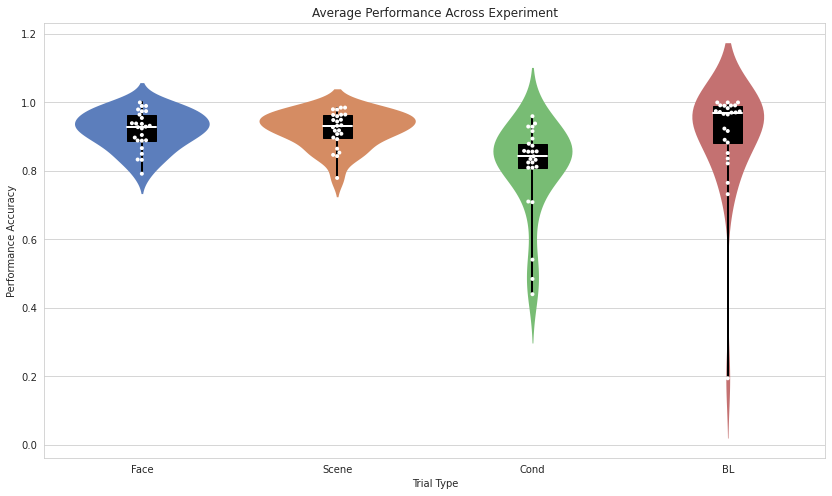

In [16]:
acc = {}
acc['face'] = df_task_freq['face_corr']/(df_task_freq['face_corr']+df_task_freq['face_incorr'])
acc['scene'] = df_task_freq['scene_corr']/(df_task_freq['scene_corr']+df_task_freq['scene_incorr'])
acc['cond'] = df_task_freq['cond_corr']/(df_task_freq['cond_corr']+df_task_freq['cond_incorr'])
acc['bl'] = df_task_freq['bl_corr']/(df_task_freq['bl_corr']+df_task_freq['bl_incorr'])
for key in acc:
    print(key, "-- Mean:", np.mean(acc[key]), "STD:", np.std(acc[key]), "Normality:", stats.shapiro(acc[key])[1])    
print("Face vs Scene Wilcoxon: ", stats.wilcoxon(acc['face'], acc['scene'])[:])
print("Face vs Cond Wilcoxon: ", stats.wilcoxon(acc['face'], acc['cond'])[:], "**")
print("Scene vs Cond Wilcoxon: ", stats.wilcoxon(acc['scene'], acc['cond'])[:], "**")
print("Face vs BL Wilcoxon: ", stats.wilcoxon(acc['face'], acc['bl'])[:])
print("Scene vs BL Wilcoxon: ", stats.wilcoxon(acc['scene'], acc['bl'])[:])
print("Cond vs BL Wilcoxon: ", stats.wilcoxon(acc['cond'], acc['bl'])[:], "**")

N = 4
ind = np.arange(N)
conditions = ['Face', 'Scene', 'Cond', 'BL' ] #labels for x-axis
allsubjs = [acc['face'], acc['scene'], acc['cond'], acc['bl']]     
fig, ax = plt.subplots(figsize = (14,8))
sns.violinplot(data=allsubjs, inner=None, linewidth=0, saturation=0.7) #violin plot
ax.boxplot(allsubjs, whis='range', positions=ind, widths=0.15, patch_artist=True, #boxplot specs
           showcaps=False, boxprops=dict(color="black", facecolor="black"),
           whiskerprops=dict(color="black", linewidth=2, linestyle="-"),
           medianprops=dict(color="w", linewidth=2))
sns.swarmplot(data=allsubjs, size=4, color="white", edgecolor="gray") #swarmplot
ax.set_xticks(ind) #sets number of x-axis ticks
ax.set_xticklabels(conditions) #sets x-axis labels
ax.set_ylabel("Performance Accuracy")
ax.set_xlabel("Trial Type")
ax.set_title("Average Performance Across Experiment")
plt.show() #refreshes drawspace

In [17]:
acc

{'face': sub-005    0.888889
 sub-006    0.850000
 sub-007    0.832461
 sub-008    0.937500
 sub-010    0.954774
 sub-012    0.979592
 sub-013    0.939394
 sub-014    0.866667
 sub-015    0.938462
 sub-016    0.974619
 sub-018    1.000000
 sub-019    0.989950
 sub-020    0.888325
 sub-021    0.905000
 sub-022    0.931937
 sub-023    0.974359
 sub-024    0.927835
 sub-025    0.833333
 sub-026    0.929293
 sub-027    0.889447
 sub-028    0.964467
 sub-029    0.791878
 sub-030    0.989691
 sub-031    0.897436
 sub-032    0.924242
 dtype: float64,
 'scene': sub-005    0.846939
 sub-006    0.908629
 sub-007    0.853403
 sub-008    0.979381
 sub-010    0.984925
 sub-012    0.960000
 sub-013    0.933333
 sub-014    0.917526
 sub-015    0.931937
 sub-016    0.985000
 sub-018    0.944444
 sub-019    0.980000
 sub-020    0.892857
 sub-021    0.865000
 sub-022    0.897436
 sub-023    0.963542
 sub-024    0.927835
 sub-025    0.843434
 sub-026    0.964646
 sub-027    0.948718
 sub-028    0.918367


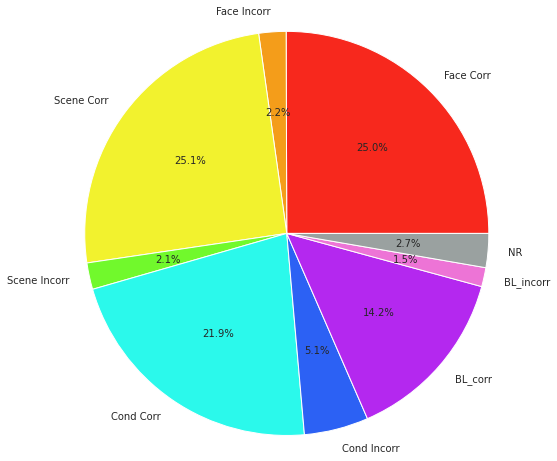

In [18]:
import matplotlib
matplotlib.axes.Axes.pie
matplotlib.pyplot.pie

N = 9
labels = ['Face Corr', 'Face Incorr', 'Scene Corr', 'Scene Incorr', 
          'Cond Corr', 'Cond Incorr', 'BL_corr', 'BL_incorr', 'NR']
colors = ['#f7281d', '#f49d1a', '#f2f22e', '#71f92c', '#2bf9eb', '#2c61f4', '#b428ef', '#ed74d6', '#9aa1a0']
allsubjs = [np.mean(df_task_freq['face_corr'])/720, 
            np.mean(df_task_freq['face_incorr'])/720,
            np.mean(df_task_freq['scene_corr'])/720, 
            np.mean(df_task_freq['scene_incorr'])/720,
            np.mean(df_task_freq['cond_corr'])/720, 
            np.mean(df_task_freq['cond_incorr'])/720,
            np.mean(df_task_freq['bl_corr'])/720,
            np.mean(df_task_freq['bl_incorr'])/720,
            np.mean(df_task_freq['nonresp'])/720]
fig, ax = plt.subplots(figsize = (8,8))
ax.pie(allsubjs, labels = labels, colors = colors, autopct='%1.1f%%', startangle = 0)
ax.axis('equal')
plt.show()

## Performance: Reaction Time

In [19]:
df_task_rt

,face_corr,face_incorr,scene_corr,scene_incorr,cond_corr,cond_incorr,bl_corr,bl_incorr
sub-005,0.235160,0.309069,0.213581,0.284761,0.231924,0.214681,0.225475,NaN
sub-006,0.238549,0.243078,0.246873,0.268830,0.314145,0.362219,0.256602,0.294765
sub-007,0.302304,0.285206,0.322494,0.283633,0.304697,0.313829,0.315308,0.350303
sub-008,0.166884,0.261412,0.153287,0.166975,0.184639,0.292591,0.171726,0.187821
sub-010,0.269608,0.318849,0.272255,0.266970,0.236708,0.339655,0.223187,0.285340
sub-012,0.194149,0.279478,0.208912,0.254479,0.270904,0.225312,0.269283,0.350297
sub-013,0.253733,0.297518,0.273051,0.220830,0.236059,0.219424,0.231414,0.244842
sub-014,0.233739,0.325323,0.243654,0.309667,0.268531,0.355654,0.179093,0.017003
sub-015,0.242668,0.333655,0.232144,0.343891,0.242173,0.397844,0.234772,0.300350
sub-016,0.145384,0.253643,0.144749,0.250343,0.195566,0.294082,0.191652,0.190496


#### Calculates average and deals with Nan values for high-performing Ss

In [20]:
task_rt_avg ={}
task_rt_std = {}

for key in rt_table: 
    task_rt_avg[key] = np.nanmean(rt_table[key])
    task_rt_std[key] = np.nanstd(rt_table[key])
task_rt_avg = pd.DataFrame(task_rt_avg, index = (1,))
task_rt_std = pd.DataFrame(task_rt_std, index = (1,))

In [21]:
task_rt_avg

,face_corr,face_incorr,scene_corr,scene_incorr,cond_corr,cond_incorr,bl_corr,bl_incorr
1,0.242548,0.296223,0.241729,0.295021,0.249259,0.291998,0.255104,0.293032


In [22]:
task_rt_std

,face_corr,face_incorr,scene_corr,scene_incorr,cond_corr,cond_incorr,bl_corr,bl_incorr
1,0.049198,0.052188,0.048517,0.067532,0.043461,0.05663,0.044746,0.116378


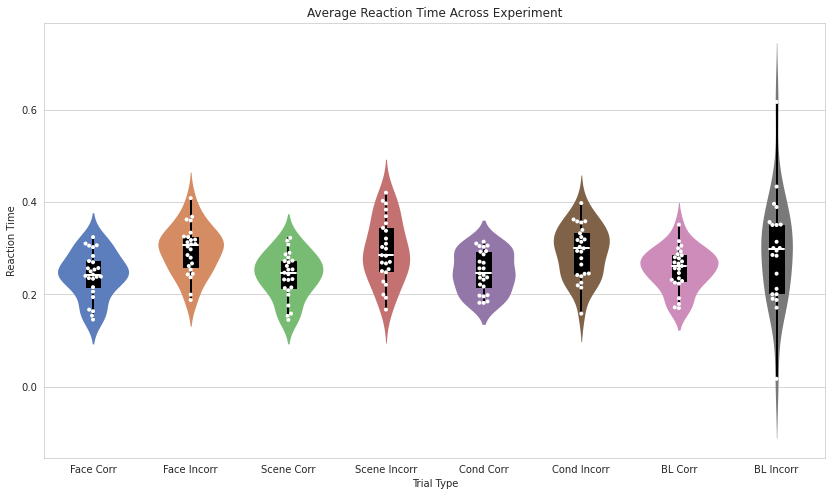

In [23]:
N = 8
ind = np.arange(N)
conditions = ['Face Corr', 'Face Incorr', 'Scene Corr', 'Scene Incorr', 
              'Cond Corr', 'Cond Incorr', 'BL Corr', 'BL Incorr'] #labels for x-axis
allsubjs = [df_task_rt['face_corr'], df_task_rt['face_incorr'].dropna(),
            df_task_rt['scene_corr'], df_task_rt['scene_incorr'],
            df_task_rt['cond_corr'], df_task_rt['cond_incorr'],
            df_task_rt['bl_corr'], df_task_rt['bl_incorr'].dropna()]     
fig, ax = plt.subplots(figsize = (14,8))
sns.violinplot(data=allsubjs, inner=None, linewidth=0, saturation=0.7) #violin plot
ax.boxplot(allsubjs, whis='range', positions=ind, widths=0.15, patch_artist=True, #boxplot specs
           showcaps=False, boxprops=dict(color="black", facecolor="black"),
           whiskerprops=dict(color="black", linewidth=2, linestyle="-"),
           medianprops=dict(color="w", linewidth=2))
sns.swarmplot(data=allsubjs, size=4, color="white", edgecolor="gray") #swarmplot
ax.set_xticks(ind) #sets number of x-axis ticks
ax.set_xticklabels(conditions) #sets x-axis labels
ax.set_ylabel("Reaction Time")
ax.set_xlabel("Trial Type")
ax.set_title("Average Reaction Time Across Experiment")
plt.show() #refreshes drawspace

# Descriptives: Breakdown By Run

In [24]:
subs = ['sub-005', 'sub-006', 'sub-007', 'sub-008', 'sub-010', 
        'sub-012', 'sub-013', 'sub-014', 'sub-015', 'sub-016', 
        'sub-018', 'sub-019', 'sub-020', 'sub-021', 'sub-022', 
        'sub-023', 'sub-024', 'sub-025', 'sub-026', 'sub-027', 
        'sub-028', 'sub-029', 'sub-030', 'sub-031', 'sub-032']
subs1 = ['sub-021']
counts = {}
rts = {}

for run in ['run1', 'run2', 'run3', 'run4']:
    for trial in ['face', 'scene', 'COND', 'BL']:
        for acc in ['corr', 'incorr']:
            counts['{0}_{1}_{2}'.format(run, trial, acc)] = []
            rts['{0}_{1}_{2}'.format(run, trial, acc)] = []
    counts['{0}_NR'.format(run)] = []

for i, sub in enumerate(subs):
    sub_dir = '/home/data/madlab/Mattfeld_vCAT/behav/{0}/'.format(sub)
    task_files = sorted(glob(join(sub_dir, '{0}_simp_task*.csv'.format(sub)))) 
    
    for curr_run in range(4): 
        run = pd.read_csv(task_files[curr_run])   
        trialtype = run['trialtype'].values #variables containing key values
        stim = run['stim'].values
        acc = run['acc'].values
        resp = run['resp'].values
        rt = run['rt'].values 
        
        for trial in ['face', 'scene', 'COND', 'BL', 'NR']:
            if trial == 'face' or trial == 'scene': #fixed trials
                corr_idx = np.where(((stim=="{0}1".format(trial))|(stim=="{0}2".format(trial)))&(acc==1))[0]              
                eval('counts["run{0}_{1}_corr"].append(len(corr_idx))'.format(curr_run+1,trial))
                eval('rts["run{0}_{1}_corr"].append(np.nanmean(rt[corr_idx]))'.format(curr_run+1, trial))
                incorr_idx = np.where(((stim=="{0}1".format(trial))|(stim=="{0}2".format(trial)))
                                      &(acc==0)&(resp!='None'))[0]
                eval('counts["run{0}_{1}_incorr"].append(len(incorr_idx))'.format(curr_run+1,trial))
                eval('rts["run{0}_{1}_incorr"].append(np.nanmean(rt[incorr_idx]))'.format(curr_run+1, trial))
            elif trial == 'COND': #conditional trials
                corr_idx = np.where((stim=="COND".format(trial))&(acc==1))[0]
                eval('counts["run{0}_{1}_corr"].append(len(corr_idx))'.format(curr_run+1,trial))
                eval('rts["run{0}_{1}_corr"].append(np.nanmean(rt[corr_idx]))'.format(curr_run+1, trial))
                incorr_idx = np.where((stim=="COND".format(trial))&(acc==0)&(resp!='None'))[0]
                eval('counts["run{0}_{1}_incorr"].append(len(incorr_idx))'.format(curr_run+1,trial))
                eval('rts["run{0}_{1}_incorr"].append(np.nanmean(rt[incorr_idx]))'.format(curr_run+1, trial))
            elif trial == 'BL': #baseline trials
                corr_idx = np.where((trialtype=="BL".format(trial))&(acc==1))[0]
                eval('counts["run{0}_{1}_corr"].append(len(corr_idx))'.format(curr_run+1,trial))
                eval('rts["run{0}_{1}_corr"].append(np.nanmean(rt[corr_idx]))'.format(curr_run+1, trial))
                incorr_idx = np.where((trialtype=="BL".format(trial))&(acc==0)&(resp!='None'))[0]
                eval('counts["run{0}_{1}_incorr"].append(len(incorr_idx))'.format(curr_run+1,trial))     
                eval('rts["run{0}_{1}_incorr"].append(np.nanmean(rt[incorr_idx]))'.format(curr_run+1, trial))
            elif trial == 'NR': #Nonresponse trials
                idx = np.where((resp=='None'))[0]
                eval('counts["run{0}_{1}"].append(len(idx))'.format(curr_run+1,trial))
                

#print(counts)
#print(rts)
df_runs_freq = pd.DataFrame(counts, index = subs) 
df_runs_rt = pd.DataFrame(rts, index = subs) 

In [25]:
df_runs_freq

,run1_face_corr,run1_face_incorr,run1_scene_corr,run1_scene_incorr,run1_COND_corr,run1_COND_incorr,run1_BL_corr,run1_BL_incorr,run1_NR,run2_face_corr,...,run3_NR,run4_face_corr,run4_face_incorr,run4_scene_corr,run4_scene_incorr,run4_COND_corr,run4_COND_incorr,run4_BL_corr,run4_BL_incorr,run4_NR
sub-005,32,9,33,15,25,17,24,0,25,50,...,3,48,1,50,0,48,0,29,0,4
sub-006,31,19,35,13,31,18,15,11,7,40,...,1,50,0,49,1,47,3,28,1,1
sub-007,40,8,39,8,20,26,24,0,15,46,...,14,43,7,46,4,24,20,28,0,8
sub-008,41,7,46,2,40,9,28,1,6,47,...,8,48,1,47,2,43,4,22,4,9
sub-010,48,2,46,3,45,4,28,2,2,48,...,0,50,0,50,0,50,0,26,4,0
sub-012,48,1,44,6,47,2,27,3,2,46,...,3,49,0,50,0,47,3,25,4,2
sub-013,38,11,42,8,37,13,30,0,1,49,...,9,50,0,49,1,45,5,29,0,1
sub-014,42,6,49,1,39,10,26,0,7,45,...,12,42,8,42,3,32,12,28,1,12
sub-015,42,8,39,10,40,9,27,1,4,48,...,11,49,0,48,0,38,10,26,0,9
sub-016,47,2,48,2,40,9,21,5,6,50,...,1,48,1,50,0,44,6,25,4,2


'   \n    for k in range(2):\n        print(\'Run{0} Normality:\'.format(k*2+1), stats.shapiro(acc[\'run{0}\'.format(k*2+1)])[1], \n              \'Run{0} Normality:\'.format(k*2+2), stats.shapiro(acc[\'run{0}\'.format(k*2+2)])[1])\n        if stats.shapiro(acc[\'run{0}\'.format(k*2+2)])[1] < 0.049 or stats.shapiro(acc[\'run{0}\'.format(k*2+1)])[1] < 0.049:\n            #conditional to visually indicate if the results are statistically significant (corrected for mutliple comaprisions)\n            if stats.wilcoxon(acc[\'run{0}\'.format(k*2+2)], acc[\'run{0}\'.format(k*2+1)])[:][-1] < 0.017: #correction for multi comparisons\n                print("Wilcoxon Set{0}".format(k+1),stats.wilcoxon(acc[\'run{0}\'.format(k*2+2)],acc[\'run{0}\'.format(k*2+1)])[:], "<---- **")\n            else:\n                print("Wicoxon Set{0}".format(k+1), stats.wilcoxon(acc[\'run{0}\'.format(i*2+2)],acc[\'run{0}\'.format(k*2+1)])[:])\n        else: #if distribution is normally distributed\n            i

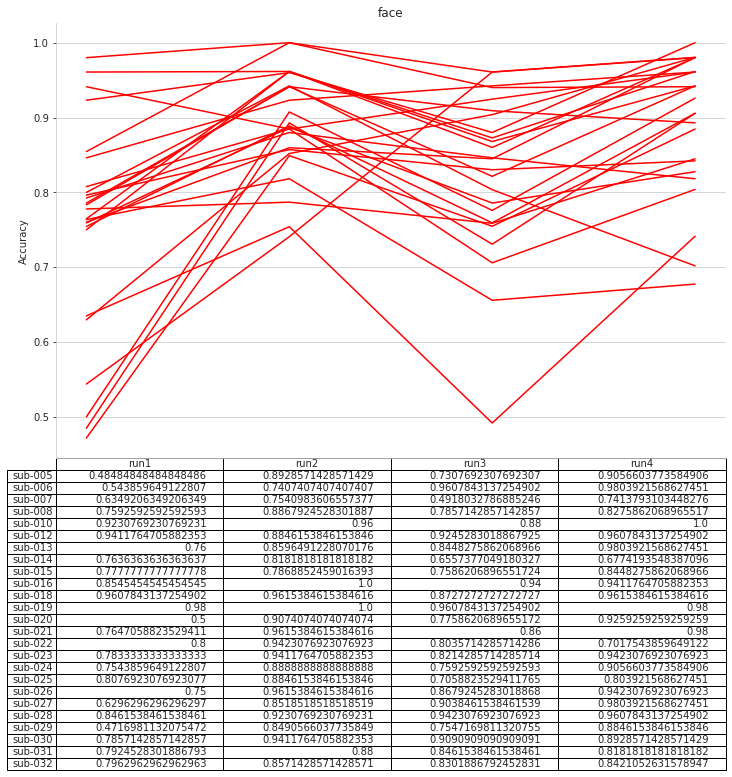

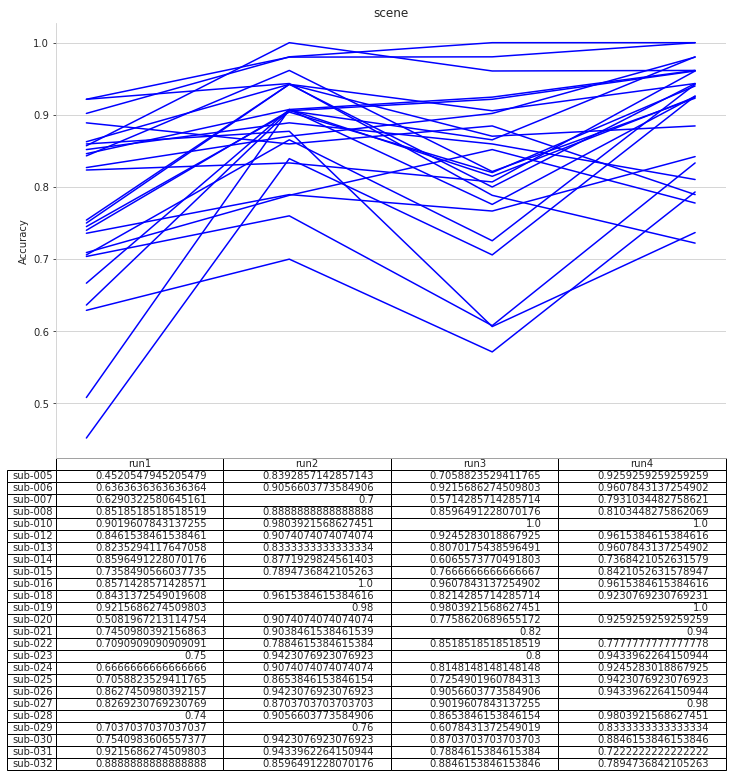

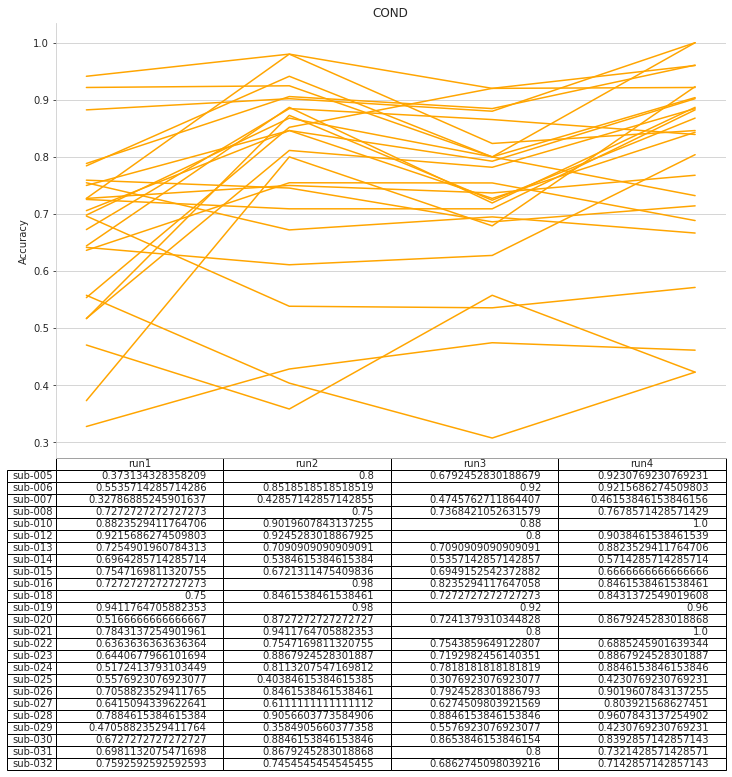

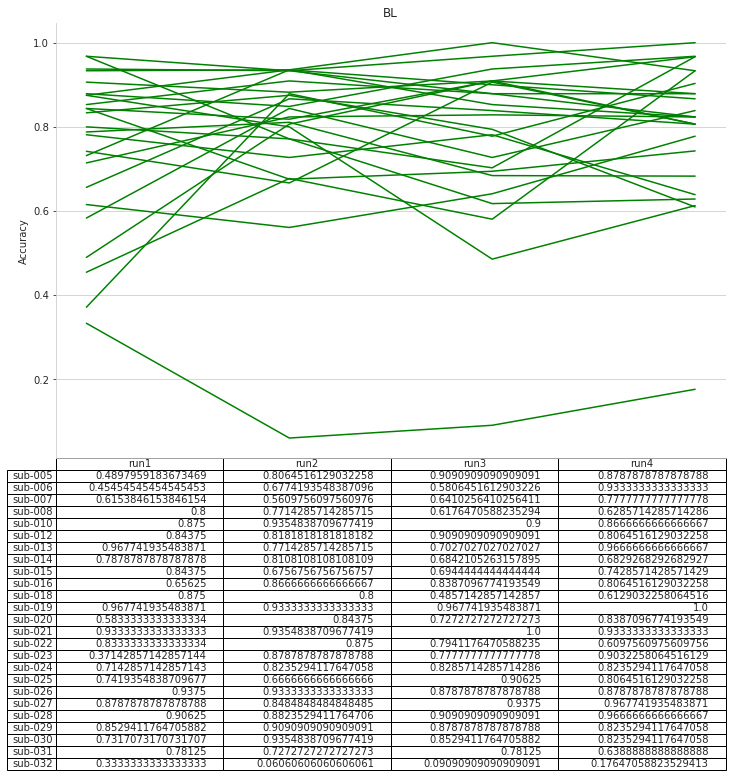

In [26]:
face = {}
scene = {}
COND = {}
BL = {}

colors = ['red', 'blue', 'orange', 'green']
for i, trial in enumerate(['face', 'scene', 'COND', 'BL']):
    for j in range(4):
        exec('{1}["run{0}"] = df_runs_freq["run{0}_{1}_corr"]/(df_runs_freq["run{0}_{1}_corr"]+df_runs_freq["run{0}_{1}_incorr"]+df_runs_freq["run{0}_NR"])'.format(j+1,trial))  
    exec('{0}_df=pd.DataFrame({0})'.format(trial)) 
    #print(trial,eval('{0}_df'.format(trial))) 

    N = 4
    ind = np.arange(N)
    conditions = ['Run1', 'Run2', 'Run3', 'Run4'] #labels for x-axis
    allsubjs = [eval('{0}_df["run1"]'.format(trial)),
                eval('{0}_df["run2"]'.format(trial)),
                eval('{0}_df["run3"]'.format(trial)),
                eval('{0}_df["run4"]'.format(trial))]       
    fig, ax = plt.subplots(figsize=(12,8))
    sns.despine(top=True)  
    df = pd.DataFrame(eval('{0}_df.T'.format(trial)))   
    df.plot(table=True, ax=ax, legend=False, color=colors[i])    
    ax.get_xaxis().set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(ind) #sets number of x-axis ticks
    ax.set_xticklabels(conditions) #sets x-axis labels
    ax.set_ylabel("Accuracy")
    #ax.set_xlabel("Trial Type")
    ax.set_title('{0}'.format(trial))
'''   
    for k in range(2):
        print('Run{0} Normality:'.format(k*2+1), stats.shapiro(acc['run{0}'.format(k*2+1)])[1], 
              'Run{0} Normality:'.format(k*2+2), stats.shapiro(acc['run{0}'.format(k*2+2)])[1])
        if stats.shapiro(acc['run{0}'.format(k*2+2)])[1] < 0.049 or stats.shapiro(acc['run{0}'.format(k*2+1)])[1] < 0.049:
            #conditional to visually indicate if the results are statistically significant (corrected for mutliple comaprisions)
            if stats.wilcoxon(acc['run{0}'.format(k*2+2)], acc['run{0}'.format(k*2+1)])[:][-1] < 0.017: #correction for multi comparisons
                print("Wilcoxon Set{0}".format(k+1),stats.wilcoxon(acc['run{0}'.format(k*2+2)],acc['run{0}'.format(k*2+1)])[:], "<---- **")
            else:
                print("Wicoxon Set{0}".format(k+1), stats.wilcoxon(acc['run{0}'.format(i*2+2)],acc['run{0}'.format(k*2+1)])[:])
        else: #if distribution is normally distributed
            if stats.ttest_rel(acc['run{0}'.format(k*2+2)],acc['run{0}'.format(k*2+1)])[:][-1] < 0.017: #correction for multi comparisons
                print("t-test{0}".format(k+1),stats.ttest_rel(acc['run{0}'.format(k*2+2)], acc['run{0}'.format(k*2+1)])[:], "<---- **")
            else:
                print("t-test{0}".format(k+1), stats.ttest_rel(acc['run{0}'.format(k*2+2)], acc['run{0}'.format(k*2+1)])[:])        
        cohens_d = ((np.average(acc['run{0}'.format(k*2+2)]) #calculate Cohen's d as a metric of effect size
                     - np.average(acc['run{0}'.format(k*2+1)])) 
                    / (sqrt((np.std(acc['run{0}'.format(k*2+2)], ddof = 1)) 
                    ** 2 + np.std(acc['run{0}'.format(k*2+1)], ddof = 1) ** 2) / 2))
        print("Cohen's d = ", cohens_d)    
    plt.show() #refreshes drawspace
'''

In [27]:
df_runs_rt

,run1_face_corr,run1_face_incorr,run1_scene_corr,run1_scene_incorr,run1_COND_corr,run1_COND_incorr,run1_BL_corr,run1_BL_incorr,run2_face_corr,run2_face_incorr,...,run3_BL_corr,run3_BL_incorr,run4_face_corr,run4_face_incorr,run4_scene_corr,run4_scene_incorr,run4_COND_corr,run4_COND_incorr,run4_BL_corr,run4_BL_incorr
sub-005,0.273768,0.361469,0.193259,0.259208,0.247004,0.189527,0.280908,NaN,0.236670,NaN,...,0.230896,NaN,0.218420,0.083590,0.236657,NaN,0.248222,NaN,0.168677,NaN
sub-006,0.320200,0.259069,0.247437,0.269543,0.357327,0.346618,0.315856,0.301838,0.247410,0.231969,...,0.279918,0.340600,0.197319,NaN,0.191133,0.400297,0.258805,0.400250,0.204446,0.050412
sub-007,0.274475,0.262799,0.319115,0.296127,0.231147,0.297115,0.373909,NaN,0.344525,NaN,...,0.215644,NaN,0.282862,0.302699,0.304646,0.279447,0.331576,0.307876,0.353882,NaN
sub-008,0.207650,0.276552,0.152107,0.191948,0.194471,0.350337,0.220531,0.100257,0.165203,NaN,...,0.165381,0.153624,0.154829,0.216919,0.158114,0.142003,0.192554,0.171123,0.146508,0.167029
sub-010,0.304139,0.350384,0.328581,0.266970,0.275132,0.383814,0.240784,0.325248,0.236070,0.300297,...,0.206489,0.278156,0.237972,NaN,0.263305,NaN,0.235315,NaN,0.238127,0.304543
sub-012,0.190594,0.266973,0.182888,0.264195,0.285057,0.116934,0.299699,0.278061,0.172047,0.342012,...,0.244191,NaN,0.211877,NaN,0.212316,NaN,0.252461,0.378107,0.252322,0.437794
sub-013,0.241109,0.312428,0.269761,0.212819,0.277342,0.228479,0.219198,NaN,0.260187,0.133507,...,0.253556,0.233783,0.247987,NaN,0.296918,0.400257,0.225855,0.130331,0.233061,NaN
sub-014,0.241979,0.408631,0.244170,0.250343,0.271691,0.342029,0.203522,NaN,0.218810,0.333761,...,0.161836,NaN,0.220560,0.254483,0.266205,0.350292,0.254992,0.364170,0.209814,0.017003
sub-015,0.279695,0.356551,0.306719,0.383631,0.296971,0.461416,0.243513,0.300350,0.237455,0.433630,...,0.277670,NaN,0.222792,NaN,0.182961,NaN,0.233624,0.425295,0.186187,NaN
sub-016,0.178367,0.200325,0.173620,0.308638,0.212454,0.235491,0.334444,0.260333,0.155334,NaN,...,0.135567,0.166939,0.091294,0.133682,0.106299,NaN,0.177580,0.283704,0.129642,0.071136


In [28]:
runs_rt_avg ={}
runs_rt_std = {}
fuk_nan = []

for curr_run in range(4):
    for key in rts: 
        runs_rt_avg[key] = np.nanmean(rts[key])
        runs_rt_std[key] = np.nanstd(rts[key])
runs_rt_avg = pd.DataFrame(runs_rt_avg, index = (1,))
runs_rt_std = pd.DataFrame(runs_rt_std, index = (1,))

In [29]:
runs_rt_avg

,run1_face_corr,run1_face_incorr,run1_scene_corr,run1_scene_incorr,run1_COND_corr,run1_COND_incorr,run1_BL_corr,run1_BL_incorr,run2_face_corr,run2_face_incorr,...,run3_BL_corr,run3_BL_incorr,run4_face_corr,run4_face_incorr,run4_scene_corr,run4_scene_incorr,run4_COND_corr,run4_COND_incorr,run4_BL_corr,run4_BL_incorr
1,0.262198,0.308941,0.263811,0.295868,0.264305,0.29497,0.29106,0.260647,0.246934,0.300032,...,0.252789,0.271447,0.227655,0.283527,0.226889,0.302169,0.241833,0.287058,0.228926,0.273206


In [30]:
runs_rt_std

,run1_face_corr,run1_face_incorr,run1_scene_corr,run1_scene_incorr,run1_COND_corr,run1_COND_incorr,run1_BL_corr,run1_BL_incorr,run2_face_corr,run2_face_incorr,...,run3_BL_corr,run3_BL_incorr,run4_face_corr,run4_face_incorr,run4_scene_corr,run4_scene_incorr,run4_COND_corr,run4_COND_incorr,run4_BL_corr,run4_BL_incorr
1,0.061621,0.076818,0.066858,0.085767,0.054975,0.075502,0.052723,0.082301,0.058563,0.120162,...,0.054184,0.125429,0.049981,0.14101,0.049988,0.101085,0.044456,0.088555,0.059583,0.155356


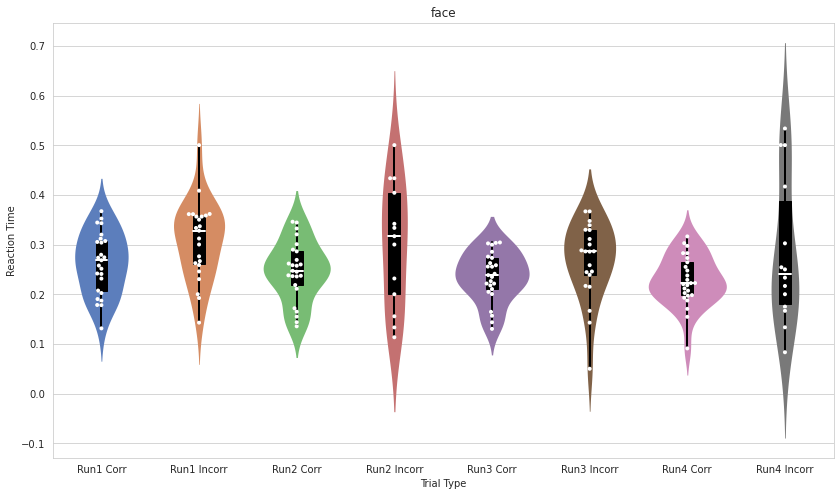

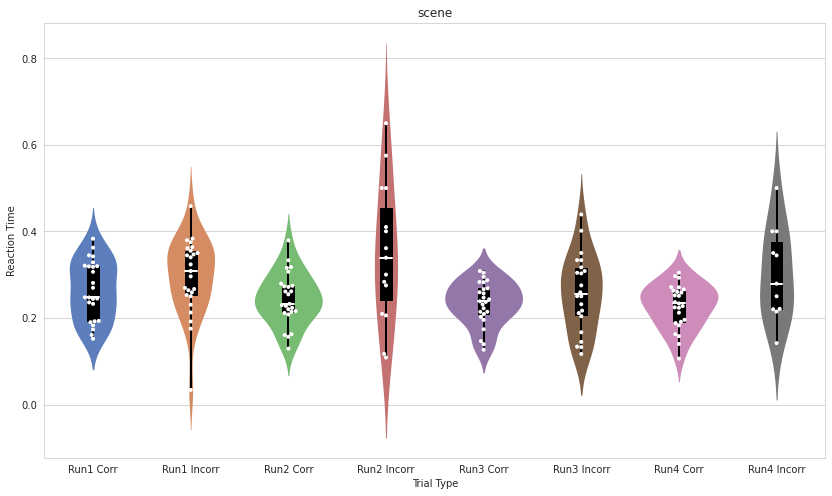

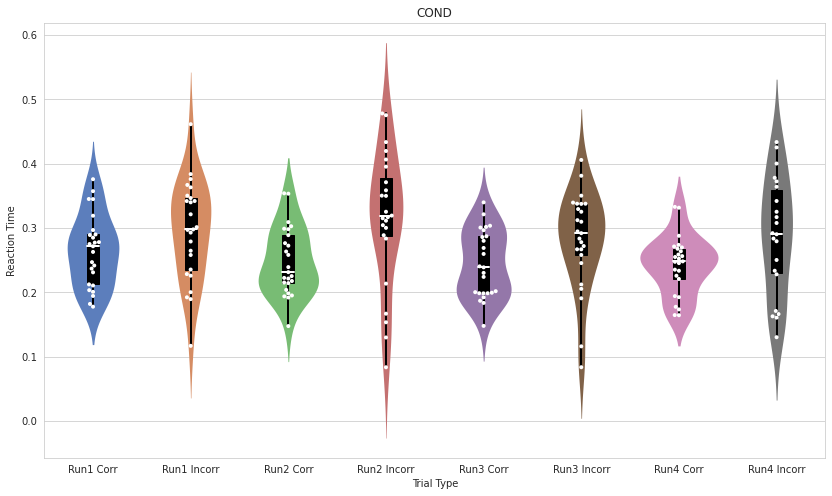

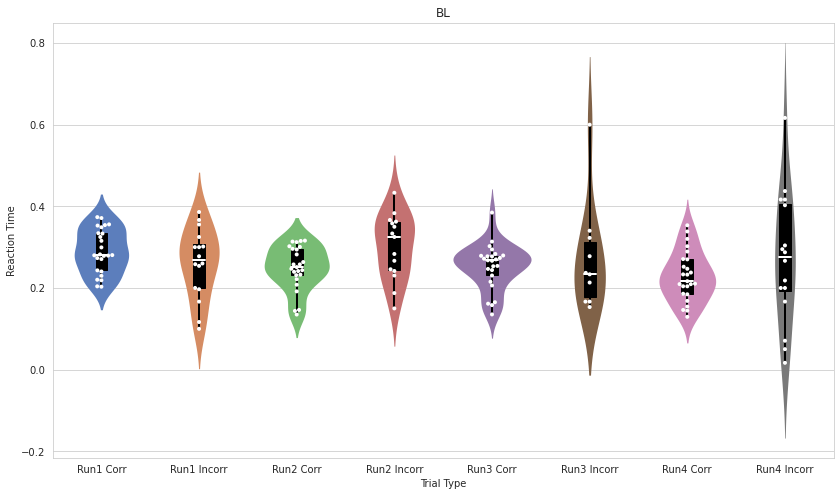

In [31]:
for trial in ['face', 'scene', 'COND', 'BL']:
    N = 8
    ind = np.arange(N)
    conditions = ['Run1 Corr', 'Run1 Incorr', 'Run2 Corr', 'Run2 Incorr', 
                  'Run3 Corr', 'Run3 Incorr', 'Run4 Corr', 'Run4 Incorr'] #labels for x-axis
    allsubjs = [df_runs_rt['run1_{0}_corr'.format(trial)], df_runs_rt['run1_{0}_incorr'.format(trial)].dropna(),
                df_runs_rt['run2_{0}_corr'.format(trial)], df_runs_rt['run2_{0}_incorr'.format(trial)].dropna(),
                df_runs_rt['run3_{0}_corr'.format(trial)], df_runs_rt['run3_{0}_incorr'.format(trial)].dropna(),
                df_runs_rt['run4_{0}_corr'.format(trial)], df_runs_rt['run4_{0}_incorr'.format(trial)].dropna()]     
    fig, ax = plt.subplots(figsize = (14,8))
    sns.violinplot(data=allsubjs, inner=None, linewidth=0, saturation=0.7) #violin plot
    ax.boxplot(allsubjs, whis=[0,100], positions=ind, widths=0.12, patch_artist=True, #boxplot specs
               showcaps=False, boxprops=dict(color="black", facecolor="black"),
               whiskerprops=dict(color="black", linewidth=2, linestyle="-"),
               medianprops=dict(color="w", linewidth=2))
    sns.swarmplot(data=allsubjs, size=4, color="white", edgecolor="gray") #swarmplot
    ax.set_xticks(ind) #sets number of x-axis ticks
    ax.set_xticklabels(conditions) #sets x-axis labels
    ax.set_ylabel("Reaction Time")
    ax.set_xlabel("Trial Type")
    ax.set_title('{0}'.format(trial))
    plt.show() #refreshes drawspace